### Analyzing the Stroop Effect
Perform the analysis in the space below. Remember to follow [the instructions](https://docs.google.com/document/d/1-OkpZLjG_kX9J6LIQ5IltsqMzVWjh36QpnP2RYpVdPU/pub?embedded=True) and review the [project rubric](https://review.udacity.com/#!/rubrics/71/view) before submitting. Once you've completed the analysis and write-up, download this file as a PDF or HTML file, upload that PDF/HTML into the workspace here (click on the orange Jupyter icon in the upper left then Upload), then use the Submit Project button at the bottom of this page. This will create a zip file containing both this .ipynb doc and the PDF/HTML doc that will be submitted for your project.


(1) What is the independent variable? What is the dependent variable?

**Independent Variable:** Congruent or incongruent condition.

**Dependent Variable:** The Amount of time to name the color and complete the test.

(2) What is an appropriate set of hypotheses for this task? Specify your null and alternative hypotheses, and clearly define any notation used. Justify your choices.

- **(The Null Hypothesis)**  **$H_{0}$:** There is no difference or noticeable difference in the mean completion time for the congruent tests vs the incongruent tests.

$$ H_{0}: (μ_{i} - μ_{c} = 0) $$

- **(The Alternative Hypothesis)** **$H_{1}$:** There is a noticeable difference in the mean completion time for the congruent test vs the incongruent tests.

$$ H_{1}: (μ_{i} - μ_{c} ≠ 0) $$
Where,
- **$μ_{i}:$** The population mean for the incongruent completion time.
- **$μ_{c}:$** The population mean for the congruent completion time.

I'm going to perform a **Dependent Samples t-Test** and is the most appropriate because of the following reasons:
    1. There is no randomization in the dataset.
    2. We are comparing the mean of two related groups.
    3. Both Congruent and Incongruent are Dependent Variables in the dataset.
    4. The sample size is less than 30.
    5. We are assuming the distribution is normal.
    6. We don't have the population standard deviation.

(3) Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability. The name of the data file is 'stroopdata.csv'.

In [45]:
# Importing the required libraries
import pandas as pd
# Reading the data 
stroop_df = pd.read_csv('stroopdata.csv')
# Describing the data.
stroop_df.describe()

,Congruent,Incongruent
count,24.000000,24.000000
mean,14.051125,22.015917
std,3.559358,4.797057
min,8.630000,15.687000
25%,11.895250,18.716750
50%,14.356500,21.017500
75%,16.200750,24.051500
max,22.328000,35.255000


**Measure of Central Tendency:**
- Congruent Mean is Approximately 14.051.
- Incongruent Mean is Approximately 22.015.

**Measure of Variability:**
- Congruent Standard Deviation is Approximately 3.559.
- Incongruent Standard Deviation is Approximately 4.797. 

(4) Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.

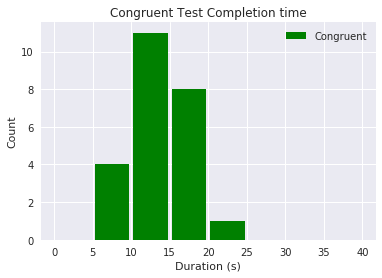

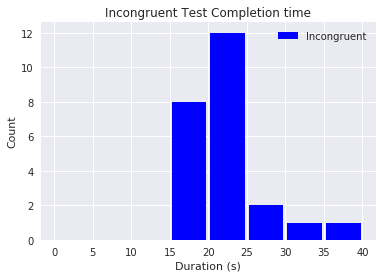

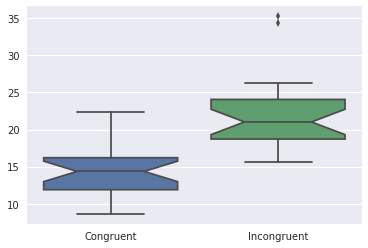

In [46]:
# Importing required libraries for visualizations
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline
# Setting up the style
sns.set(style='darkgrid')
# bins for 5 minutes wide
bins = [0,5,10,15,20,25,30,35,40]
# Plotting the Congruent Conditions
plt.hist(stroop_df['Congruent'], bins, rwidth=0.9, color='g',label='Congruent')
plt.title('Congruent Test Completion time')
plt.xlabel('Duration (s)')
plt.ylabel('Count')
plt.legend()
plt.show()
# Plotting the Incongruent Conditions
plt.hist(stroop_df['Incongruent'], bins, rwidth=0.9, color='b',label='Incongruent')
plt.title('Incongruent Test Completion time')
plt.xlabel('Duration (s)')
plt.ylabel('Count')
plt.legend()
plt.show()
# Plotting a box plot
sns.boxplot(data=stroop_df, notch=True);

**From the above plots we can observe:**
    1. Both histogram look's normally distributed.
    2. From the boxplot, we can observe that there are outliers in the incongruent sample.
    3. The mean in the Incongruent sample is higher than the Congruent sample.

(5)  Now, perform the statistical test and report your results. What is your confidence level or Type I error associated with your test? What is your conclusion regarding the hypotheses you set up? Did the results match up with your expectations? **Hint:**  Think about what is being measured on each individual, and what statistic best captures how an individual reacts in each environment.

In [47]:
# Importing required libraries for the test
import math
from scipy.stats import t

# Getting the sample size
sample_size = len(stroop_df)
print('Our sample size is {}'.format(sample_size))

# Getting the mean of Congruent and Incongruent
cong_mean = stroop_df['Congruent'].mean()
incong_mean = stroop_df['Incongruent'].mean()
# Calculating the point estimate diffrence
point_estimate = incong_mean - cong_mean
print('The point estimate diffrence between mean is {}'.format(point_estimate))

Our sample size is 24
The point estimate diffrence between mean is 7.964791666666667


In [48]:
# Making our confidence level and degree of freedom
t_crit = t.ppf(.95,23)
print('At a confidence level of 95 and Degree of freedom of 23 our t-critical value is {}'.format(t_crit))

# Making a new column calculating the diffrence between Congruent and Incongruent
stroop_df['Diffrence'] = stroop_df['Incongruent'] - stroop_df['Congruent']

# Calculating the diffrence Standard deviation
dif_std = stroop_df['Diffrence'].std()
print('The Standard Deviation is {}'.format(dif_std))

At a confidence level of 95 and Degree of freedom of 23 our t-critical value is 1.7138715277470473
The Standard Deviation is 4.864826910359056


In [49]:
# Calculating the t-statistic
t_stat = point_estimate/(dif_std/math.sqrt(sample_size))
print('Our T-Statistic is {}'.format(t_stat))

Our T-Statistic is 8.020706944109957


At a confidence level of **95%**, a critical value of **1.713** and t-statistic of **8.02**, Meaning that our t-statistic is way higher than our critical value, which concludes to **rejecting the null hypothesis**.

(6) Optional: What do you think is responsible for the effects observed? Can you think of an alternative or similar task that would result in a similar effect? Some research about the problem will be helpful for thinking about these two questions!

I think that our brain focuses on recognizing the words faster than recognizing the color which may cause the effect and wanting to finish the test as soon as possible, I can see this task being in numbers or shapes which may affect similar results.